In [6]:
%matplotlib inline

import torch
import numpy as np
from pytorch3d.ops import knn_points
from pytorch3d.loss import chamfer_distance
import matplotlib.pyplot as plt


case = 9
#centers of the clusters
if case == 1:
    centers = [(4.959677419354839, 16.40692640692641), (4.717741935483871, 13.268398268398268), (7.459677419354839, 15.378787878787879), (7.096774193548387, 13.051948051948054), (9.39516129032258, 14.512987012987015), (8.79032258064516, 12.077922077922079), (11.29032258064516, 13.376623376623378), (10.403225806451612, 10.941558441558442), (13.064516129032256, 11.645021645021647), (11.653225806451612, 10.075757575757576), (14.112903225806452, 9.264069264069265), (12.177419354838708, 7.965367965367966)]
    vectors = [(6.048387096774193, 15.91991341991342), (5.604838709677419, 12.61904761904762), (8.79032258064516, 15.703463203463205), (8.346774193548388, 13.376623376623378), (10.68548387096774, 14.621212121212121), (9.35483870967742, 10.995670995670997), (11.975806451612904, 12.727272727272728), (10.766129032258064, 9.751082251082252), (14.39516129032258, 11.103896103896105), (11.653225806451612, 8.344155844155845)]
elif case ==2:
    centers = [(3.991935483870968, 16.569264069264072), (3.870967741935484, 13.214285714285715), (6.411290322580645, 15.865800865800868), (6.008064516129033, 12.835497835497836), (8.266129032258064, 13.80952380952381), (7.298387096774193, 11.861471861471863), (9.758064516129032, 11.32034632034632), (8.10483870967742, 10.346320346320347), (10.443548387096772, 8.993506493506494), (8.991935483870968, 8.181818181818183), (10.806451612903224, 6.720779220779221), (9.314516129032256, 6.287878787878789)]

    vectors = [(5.766129032258065, 16.67748917748918), (5.362903225806451, 13.160173160173162), (7.540322580645161, 14.83766233766234), (7.338709677419355, 12.781385281385283), (9.233870967741936, 12.510822510822512), (8.266129032258064, 11.374458874458876), (10.60483870967742, 10.346320346320347), (8.830645161290324, 9.264069264069265), (11.814516129032256, 7.316017316017316), (9.516129032258064, 7.153679653679655)]
elif case == 3:
    centers =[(3.991935483870968, 15.974025974025977), (3.790322580645161, 11.861471861471863), (7.338709677419355, 15.324675324675326), (6.733870967741935, 11.42857142857143), (10.282258064516128, 13.647186147186147), (9.072580645161292, 11.103896103896105), (12.338709677419356, 11.482683982683984), (10.282258064516128, 9.85930735930736), (14.314516129032256, 8.93939393939394), (11.532258064516128, 7.857142857142858), (14.35483870967742, 5.692640692640692), (11.814516129032256, 5.151515151515152)]

    vectors =[(6.370967741935483, 16.2987012987013), (5.443548387096775, 11.049783549783552), (9.637096774193548, 14.891774891774894), (8.387096774193548, 11.32034632034632), (11.330645161290324, 11.536796536796539), (11.733870967741936, 12.34848484848485), (9.637096774193548, 7.478354978354979), (13.14516129032258, 9.426406926406928), (11.693548387096772, 6.233766233766234), (14.677419354838708, 6.991341991341992)]
elif case == 4:
    centers = [(2.983870967741936, 6.396103896103897), (2.903225806451613, 2.824675324675325), (4.637096774193548, 7.424242424242426), (5.201612903225807, 5.043290043290043), (5.685483870967741, 9.372294372294373), (7.177419354838709, 7.532467532467534), (5.766129032258065, 12.023809523809526), (7.741935483870967, 10.995670995670997), (5.766129032258065, 14.458874458874462), (8.024193548387096, 14.296536796536799), (5.524193548387097, 17.110389610389614), (7.983870967741935, 17.380952380952383)]

    vectors = [(4.07258064516129, 6.666666666666668), (6.008064516129033, 3.365800865800866), (5.846774193548387, 8.777056277056278), (7.661290322580645, 6.666666666666668), (6.451612903225807, 10.292207792207794), (7.903225806451613, 10.183982683982686), (7.903225806451613, 13.051948051948054), (5.604838709677419, 13.701298701298704), (8.70967741935484, 16.352813852813856), (4.274193548387097, 16.2987012987013)]
elif case == 5:
    centers = [(2.5, 11.861471861471863), (2.5, 11.266233766233768), (2.540322580645161, 10.400432900432902), (4.07258064516129, 13.106060606060607), (4.07258064516129, 11.6991341991342), (4.153225806451613, 10.292207792207794), (5.967741935483871, 14.242424242424242), (6.008064516129033, 12.240259740259742), (6.008064516129033, 10.454545454545455), (8.427419354838708, 15.0), (8.548387096774192, 12.727272727272728), (8.669354838709676, 10.725108225108226), (10.887096774193548, 14.567099567099568), (10.806451612903224, 12.889610389610391), (10.725806451612904, 10.129870129870131)]
    vectors = [(3.508064516129032, 12.61904761904762), (3.42741935483871, 12.186147186147187), (3.75, 10.238095238095239), (5.241935483870967, 13.91774891774892), (5.443548387096775, 11.645021645021647), (5.443548387096775, 10.075757575757576), (7.540322580645161, 13.484848484848488), (7.338709677419355, 12.673160173160175), (7.338709677419355, 11.590909090909092), (10.64516129032258, 16.569264069264072), (9.798387096774192, 14.188311688311689), (9.919354838709676, 11.915584415584417)]
elif case == 6:
    centers = [(2.5, 11.861471861471863), (2.5, 11.266233766233768), (2.540322580645161, 10.400432900432902), (4.07258064516129, 13.106060606060607), (4.07258064516129, 11.6991341991342), (4.153225806451613, 10.292207792207794), (5.967741935483871, 14.242424242424242), (6.008064516129033, 12.240259740259742), (6.008064516129033, 10.454545454545455), (8.427419354838708, 15.0), (8.548387096774192, 12.727272727272728), (8.669354838709676, 10.725108225108226), (10.887096774193548, 14.567099567099568), (10.806451612903224, 12.889610389610391), (10.725806451612904, 10.129870129870131)]
    vectors = [(3.508064516129032, 12.61904761904762), (3.42741935483871, 12.486147186147187), (3.75, 12.238095238095239), (5.241935483870967, 13.91774891774892), (5.443548387096775, 11.645021645021647), (5.443548387096775, 12.075757575757576), (7.540322580645161, 13.484848484848488), (7.338709677419355, 12.673160173160175), (7.338709677419355, 11.590909090909092), (10.64516129032258, 16.569264069264072), (9.798387096774192, 14.188311688311689), (9.919354838709676, 11.915584415584417)]
elif case == 7:
    centers = [(3.588709677419355, 11.645021645021647), (3.508064516129032, 8.885281385281386), (3.42741935483871, 6.504329004329005), (5.604838709677419, 12.9978354978355), (5.846774193548387, 11.212121212121213), (5.806451612903225, 9.155844155844157), (5.766129032258065, 6.720779220779221), (7.177419354838709, 14.675324675324678), (7.580645161290323, 12.835497835497836), (7.943548387096775, 9.264069264069265), (7.862903225806451, 6.612554112554113), (8.508064516129032, 16.02813852813853), (9.233870967741936, 14.134199134199136), (9.798387096774192, 9.913419913419915), (10.080645161290324, 6.341991341991342)]
    vectors = [(4.879032258064517, 12.34848484848485), (4.717741935483871, 9.426406926406928), (4.516129032258065, 6.287878787878789), (6.330645161290323, 13.701298701298704), (6.774193548387097, 12.077922077922079), (6.774193548387097, 9.155844155844157), (6.612903225806451, 6.55844155844156), (7.903225806451613, 15.649350649350652), (8.911290322580644, 13.80952380952381), (8.911290322580644, 7.965367965367966), (9.39516129032258, 6.45021645021645)]

elif case == 8:
    centers = [(3.064516129032258, 14.350649350649352), (3.104838709677419, 11.536796536796539), (2.983870967741936, 8.722943722943723), (4.919354838709677, 13.701298701298704), (5.120967741935483, 11.266233766233768), (5.080645161290323, 9.20995670995671), (6.330645161290323, 12.9978354978355), (6.129032258064517, 11.590909090909092), (6.451612903225807, 9.480519480519481), (7.580645161290323, 11.807359307359308), (7.862903225806451, 9.58874458874459), (9.274193548387096, 12.023809523809526), (9.39516129032258, 9.913419913419915), (10.524193548387096, 12.186147186147187), (10.64516129032258, 10.129870129870131)]
    vectors = [(3.951612903225806, 14.025974025974026), (4.233870967741935, 11.42857142857143), (4.07258064516129, 8.93939393939394), (5.564516129032259, 13.538961038961041), (5.887096774193549, 11.645021645021647), (6.129032258064517, 9.58874458874459), (7.620967741935483, 12.889610389610391), (7.096774193548387, 11.645021645021647), (7.298387096774193, 9.534632034632036), (8.870967741935484, 11.915584415584417), (9.032258064516128, 9.967532467532468), (10.080645161290324, 12.186147186147187)]
elif case == 9:
    centers = [(2.17741935483871, 4.989177489177489), (4.314516129032258, 5.097402597402598), (6.491935483870967, 4.989177489177489), (3.064516129032258, 8.66883116883117), (4.556451612903226, 7.857142857142858), (6.491935483870967, 7.153679653679655), (4.919354838709677, 10.995670995670997), (6.008064516129033, 9.480519480519481), (7.137096774193549, 8.235930735930737), (7.419354838709677, 13.051948051948054), (7.580645161290323, 10.77922077922078), (7.903225806451613, 8.993506493506494), (9.475806451612904, 13.484848484848488), (9.35483870967742, 11.212121212121213), (9.314516129032256, 9.20995670995671), (12.016129032258064, 12.943722943722944), (11.129032258064516, 11.103896103896105), (10.60483870967742, 9.318181818181818), (14.43548387096774, 12.077922077922079), (12.983870967741936, 10.454545454545455), (12.016129032258064, 8.993506493506494),(15.161290322580644, 9.426406926406928), (13.83064516129032, 8.993506493506494), (12.822580645161288, 7.965367965367966)]
    vectors = [(2.338709677419355, 7.153679653679655), (4.556451612903226, 6.666666666666668), (6.653225806451613, 5.963203463203463), (4.314516129032258, 9.913419913419915), (5.362903225806451, 8.993506493506494), (6.411290322580645, 8.66883116883117), (6.370967741935483, 12.673160173160175), (7.096774193548387, 10.725108225108226), (7.701612903225807, 8.831168831168831), (8.588709677419356, 13.160173160173162), (8.75, 10.129870129870131), (8.830645161290324, 8.993506493506494), (11.451612903225808, 14.783549783549784), (10.120967741935484, 12.61904761904762), (10.282258064516128, 9.155844155844157), (13.2258064516129, 12.61904761904762), (12.5, 11.103896103896105), (12.016129032258064, 9.85930735930736), (15.68548387096774, 10.670995670995673), (13.75, 9.480519480519481), (12.338709677419356, 7.857142857142858)]#, (15.564516129032256, 7.586580086580087), (13.79032258064516, 7.424242424242426), (12.903225806451612, 6.504329004329005)]
elif case == 10:
     centers = [(2.17741935483871, 4.989177489177489), (4.314516129032258, 5.097402597402598), (6.491935483870967, 4.989177489177489), (3.064516129032258, 8.66883116883117), (4.556451612903226, 7.857142857142858), (6.491935483870967, 7.153679653679655), (4.919354838709677, 10.995670995670997), (6.008064516129033, 9.480519480519481), (7.137096774193549, 8.235930735930737), (7.419354838709677, 13.051948051948054), (7.580645161290323, 10.77922077922078), (7.903225806451613, 8.993506493506494), (9.475806451612904, 13.484848484848488), (9.35483870967742, 11.212121212121213), (9.314516129032256, 9.20995670995671), (12.016129032258064, 12.943722943722944), (11.129032258064516, 11.103896103896105), (10.60483870967742, 9.318181818181818), (14.43548387096774, 12.077922077922079), (12.983870967741936, 10.454545454545455), (12.016129032258064, 8.993506493506494),(15.161290322580644, 9.426406926406928), (13.83064516129032, 8.993506493506494), (12.822580645161288, 7.965367965367966)]
     vectors = [(2.338709677419355, 7.153679653679655), (4.556451612903226, 6.666666666666668), (6.653225806451613, 5.963203463203463), (4.314516129032258, 9.913419913419915), (5.362903225806451, 8.993506493506494), (6.411290322580645, 8.66883116883117), (6.370967741935483, 12.673160173160175), (7.096774193548387, 10.725108225108226), (7.701612903225807, 8.831168831168831), (8.588709677419356, 13.160173160173162), (8.75, 10.129870129870131), (8.830645161290324, 8.993506493506494), (11.451612903225808, 14.783549783549784), (10.120967741935484, 12.61904761904762), (10.282258064516128, 9.155844155844157), (13.2258064516129, 12.61904761904762), (12.5, 11.103896103896105), (12.016129032258064, 9.85930735930736), (15.68548387096774, 10.670995670995673), (13.75, 9.480519480519481), (12.338709677419356, 7.857142857142858), (15.564516129032256, 7.586580086580087), (13.79032258064516, 7.424242424242426), (12.903225806451612, 6.504329004329005)]
mean_it = False
if case < 0:
    if mean_it:
        padded_centers_array = torch.load('pc.pt')
        print(padded_centers_array)#not working yet
        res = torch.mean(padded_centers_array, dim=0, keepdim=True)
        print(res)

    else:
        padded_centers_array = torch.load('centers.pt')
    #print(padded_centers_array.shape)
    padded_centers_array = torch.stack(padded_centers_array)
    vectors_directions = torch.load('principal_components.pt')
    padded_vectors_directions = torch.nn.functional.normalize(vectors_directions)
    padded_vectors_directions.requires_grad = True
    optimizer = torch.optim.SGD([padded_vectors_directions], lr=0.02)
else:
    centers_array = torch.tensor(centers).detach()
    vectors_directions = torch.tensor(vectors) - centers_array[:len(vectors)]
    vectors_directions = torch.nn.functional.normalize(vectors_directions)
    zero_z = torch.zeros(len(vectors_directions))
    padded_vectors_directions = torch.column_stack((vectors_directions,zero_z))
    padded_vectors_directions.requires_grad = True
    zero_z = torch.zeros(len(centers_array))
    #print(padded_vectors_directions)
    padded_centers_array = torch.column_stack((centers_array,zero_z))

    optimizer = torch.optim.SGD([padded_vectors_directions], lr=0.02)

In [7]:
def calculate_differentiable_smoothness(centers_array,vectors_array):
    num_centers = centers_array.shape[0]
    vectors_number = vectors_array.shape[0]
    indices = torch.zeros(vectors_number, 3,dtype=torch.int64)
    for i in range(vectors_number):
        mask = np.ones(num_centers, dtype=bool)
        mask[i] = False
        new_centers_array = centers_array[mask].clone().detach()
        new_centers_array = new_centers_array.reshape(1, -1, 3)
        centers_array_i = (centers_array[i]+ vectors_array[i]).reshape(1, -1, 3)
        _,idx,_ = knn_points(centers_array_i,new_centers_array, K=2)
        idx = idx[0][0][0]
        if idx >= i:
            idx += 1
        indices[i,:] = idx
    vec = torch.zeros(num_centers,3)
    vec = vec.scatter_reduce(dim=0, index=indices, src=vectors_array, reduce='mean',include_self=False)
    res = torch.nn.functional.mse_loss(vectors_array,vec[indices[:,0]],reduction='sum')
    return res

def calculate_continuity(centers_array,vectors_array):
    num_centers = centers_array.shape[0]
    vectors_number = vectors_array.shape[0]

    indices = torch.zeros(vectors_number, 3,dtype=torch.int64)
    for i in range(vectors_array.shape[0]):
        mask = np.ones(num_centers, dtype=bool)
        mask[i] = False
        new_centers_array = centers_array[mask].clone().detach()
        new_centers_array = new_centers_array.reshape(1, -1, 3)
        centers_array_i = (centers_array[i]+ vectors_array[i]).reshape(1, -1, 3)
        _,idx,_ = knn_points(centers_array_i,new_centers_array, K=2)
        idx = idx[0][0][0]
        if idx >= i:
            idx += 1
        indices[i,:] = idx
    vec = vectors_array.mean(dim=0).repeat(vectors_number,1)
    res = torch.nn.functional.mse_loss(vectors_array,vec,reduction='sum')
    return res

def vector_exclusivity(centers_array,vectors_array):
    num_centers = centers_array.shape[0]
    vectors_number = vectors_array.shape[0]

    indices = torch.zeros(vectors_number,dtype=torch.int64)
    for i in range(vectors_number):
        mask = np.ones(num_centers, dtype=bool)
        mask[i] = False
        new_centers_array = centers_array[mask].clone().detach()
        new_centers_array = new_centers_array.reshape(1, -1, 3)
        centers_array_i = (centers_array[i]+ vectors_array[i]).reshape(1, -1, 3)
        _,idx,_ = knn_points(centers_array_i,new_centers_array, K=1)
        idx = idx[0][0][0]
        if idx >= i:
            idx += 1
        indices[i] = idx
    sum_of_losses = torch.tensor(0.0)
    for j in range(num_centers):
        mask = torch.nonzero(indices == j).flatten()
        if len(mask) > 1:
            pairs = torch.combinations(mask, r=2)
            index1, index2 = pairs.unbind(1)
            res = torch.nn.functional.mse_loss(
                vectors_array[index1],
                vectors_array[index2],
                reduction='sum'
            )
            sum_of_losses += res
    return sum_of_losses

def sum_of_lengths_loss(vectors_array):
    lengths = torch.norm(vectors_array)
    loss = torch.sum(lengths)
    return loss
#print(sum_of_lengths_loss(padded_vectors_directions))
#calculate_differentiable_smoothness(padded_centers_array,padded_vectors_directions)
#vector_exclusivity(padded_centers_array,padded_vectors_directions)
#calculate_continuity(padded_centers_array,padded_vectors_directions)

MovieWriter imagemagick unavailable; using Pillow instead.


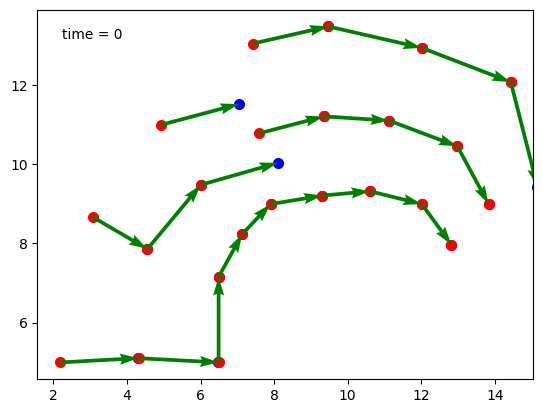

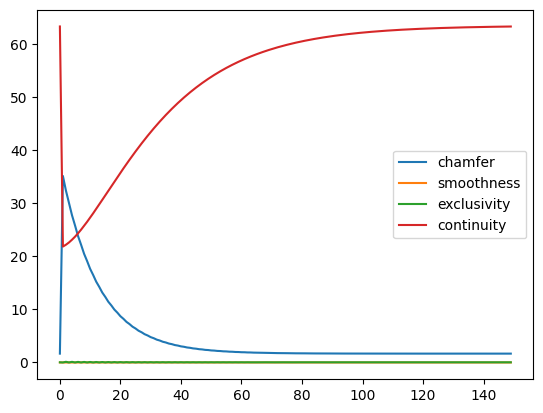

In [8]:
from matplotlib.animation import FuncAnimation, FFMpegWriter

fig = plt.figure()
ax = plt.axes()#xlim=(0, 30), ylim=(0,30))
scat = ax.scatter([], [],c='b',lw=2)
scat_from = ax.scatter([], [],c='r',lw=2)
time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
time_text.set_text('hello')
optimized_directions = padded_vectors_directions.clone().detach()
iteration_number = 150
chamfer_losses = torch.zeros(iteration_number).detach()
vector_smoothness_losses = torch.zeros(iteration_number).detach()
exclusivity_losses = torch.zeros(iteration_number).detach()
continuity_losses = torch.zeros(iteration_number).detach()
shorten_centers = padded_centers_array.clone().detach()
shorten_centers = torch.narrow(shorten_centers, 0, 0, optimized_directions.shape[0])
Q = ax.quiver( shorten_centers[:,0], shorten_centers[:,1], optimized_directions[:,0], optimized_directions[:,1] ,scale=1, color='g', angles='xy', scale_units='xy')
xdata, ydata = [], []
one_active = True
def animate(j):
    sum_of_losses = torch.tensor(0.0)
    optimizer.zero_grad()

    optimized_directions = padded_vectors_directions.clone().detach()
    x = shorten_centers[:,0] + optimized_directions[:,0]
    y = shorten_centers[:,1] + optimized_directions[:,1]
    data = np.stack([x,y]).T
    scat.set_offsets(data)
    x_from = padded_centers_array[:,0]
    y_from = padded_centers_array[:,1]
    scat_from.set_offsets(np.c_[x_from,y_from])
    Q.set_UVC(optimized_directions[:,0], optimized_directions[:,1])
    for i in range(optimized_directions.shape[0]):
        mask = np.ones(padded_centers_array.shape[0], dtype=bool)
        mask[i] = False
        new_centers_array = padded_centers_array[mask].clone().detach()
        new_centers_array = new_centers_array.reshape(1, -1, 3)  # Reshape to (1, num_points, 3)
        centers_array_i = (padded_centers_array[i]+ padded_vectors_directions[i]).reshape(1, -1, 3)
        chamfer_loss,_ = chamfer_distance(centers_array_i, new_centers_array,single_directional=True)
        sum_of_losses +=  chamfer_loss
    chamfer_losses[j] = sum_of_losses
    value =  4*calculate_differentiable_smoothness(padded_centers_array,padded_vectors_directions)
    exclusivity = 22*vector_exclusivity(padded_centers_array,padded_vectors_directions)
    continuity = 2*calculate_continuity(padded_centers_array,padded_vectors_directions)

    vector_smoothness_losses[j] = value
    exclusivity_losses[j] = exclusivity
    continuity_losses[j] = continuity
    sum_of_losses += value
    sum_of_losses += exclusivity
    #sum_of_losses += continuity
    #print(sum_of_losses)
    sum_of_losses.backward()
    optimizer.step()
    time_text.set_text('time = %.1d' % j)
    return scat, scat_from

anim = FuncAnimation(fig, animate, frames=iteration_number, interval=200)
anim.save('animation.gif', writer='imagemagick', fps=5)
plt.savefig('final.png')

#ffwriter = FFMpegWriter(fps=10)
#anim.save('animation.mp4', writer = ffwriter)
fig = plt.figure()
plt.plot(chamfer_losses.detach().numpy(),label='chamfer')    #exclusivity.backward()

plt.plot(vector_smoothness_losses.detach().numpy(),label='smoothness')
plt.plot(exclusivity_losses.detach().numpy(),label='exclusivity')
plt.plot(continuity_losses.detach().numpy(),label='continuity')
plt.legend()
plt.savefig('losses.png')

plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


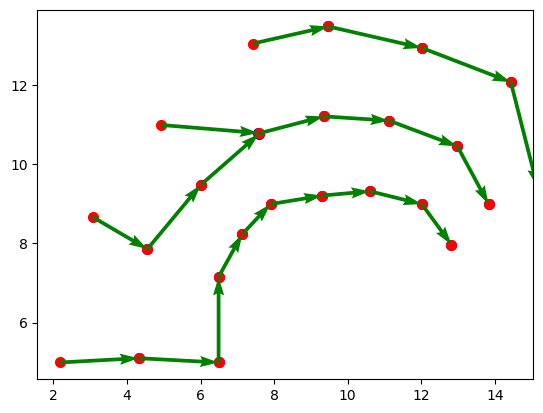

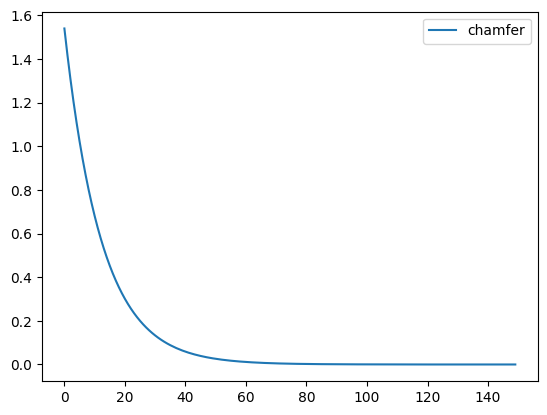

In [9]:
from matplotlib.animation import FuncAnimation
fig = plt.figure()
ax = plt.axes()#xlim=(0, 30), ylim=(0,30))
scat = ax.scatter([], [],c='b',lw=2)
scat_from = ax.scatter([], [],c='r',lw=2)
optimized_directions = padded_vectors_directions.clone().detach()
chamfer_losses = torch.zeros(iteration_number).detach()
shorten_centers = padded_centers_array.clone().detach()
shorten_centers = torch.narrow(shorten_centers, 0, 0, optimized_directions.shape[0])
Q = ax.quiver( shorten_centers[:,0], shorten_centers[:,1], optimized_directions[:,0], optimized_directions[:,1] ,scale=1, color='g', angles='xy', scale_units='xy')
xdata, ydata = [], []

def animate(j):
    sum_of_losses = 0
    optimizer.zero_grad()

    optimized_directions = padded_vectors_directions.clone().detach()
    x = shorten_centers[:,0] + optimized_directions[:,0]
    y = shorten_centers[:,1] + optimized_directions[:,1]
    data = np.stack([x,y]).T
    scat.set_offsets(data)
    x_from = padded_centers_array[:,0]
    y_from = padded_centers_array[:,1]
    scat_from.set_offsets(np.c_[x_from,y_from])
    Q.set_UVC(optimized_directions[:,0], optimized_directions[:,1])


    for i in range(optimized_directions.shape[0]):
        mask = np.ones(padded_centers_array.shape[0], dtype=bool)
        mask[i] = False
        new_centers_array = padded_centers_array[mask].clone().detach()
        new_centers_array = new_centers_array.reshape(1, -1, 3)  # Reshape to (1, num_points, 3)
        centers_array_i = (padded_centers_array[i]+ padded_vectors_directions[i]).reshape(1, -1, 3)
        chamfer_loss,_ = chamfer_distance(centers_array_i, new_centers_array,single_directional=True)
        sum_of_losses += chamfer_loss
    chamfer_losses[j] = sum_of_losses
    sum_of_losses.backward()
    optimizer.step()
    return scat, scat_from

anim = FuncAnimation(fig, animate, frames=100, interval=200)
anim.save('animation1.gif', writer='imagemagick', fps=10)
fig = plt.figure()
plt.plot(chamfer_losses.detach().numpy(),label='chamfer')
plt.legend()
plt.show()